In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [242]:
data_dir = Path.cwd().parent / "data"

In [243]:
features_df = pd.read_csv(data_dir / "training_set_features.csv",index_col = 0)
labels_df = pd.read_csv(data_dir / "training_set_labels.csv",index_col = 0)
print("features_df", features_df.shape)
features_df

features_df (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [244]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
label_cols = ['sex', 'marital_status', 'rent_or_own', 'age_group', 'education', 'income_poverty', 'race', 'employment_status', 'hhs_geo_region', 'census_msa']
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [245]:
features_df[numeric_cols] = features_df[numeric_cols].fillna(features_df[numeric_cols].median())
features_df[label_cols] = features_df[label_cols].fillna(features_df[label_cols].mode().iloc[0])

In [246]:
previsores_df = features_df.iloc[:, 0:33]
classe_df = labels_df.iloc[:, 0:2]

In [247]:
previsores = previsores_df.copy().to_numpy()

In [248]:
labelencoder = LabelEncoder()

for x in range(33):
    previsores[:, x] = labelencoder.fit_transform(previsores[:, x])

In [249]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe_df,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[2, 1, 0, ..., 1, 0, 0],
       [2, 1, 0, ..., 0, 1, 0],
       [1, 2, 0, ..., 1, 2, 0],
       ...,
       [2, 1, 0, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [3, 1, 0, ..., 2, 0, 0]], dtype=object)

In [250]:
floresta = RandomForestClassifier(n_estimators = 100)
multi_target_forest = MultiOutputClassifier(floresta)

In [251]:
multi_target_forest.fit(X_treinamento, y_treinamento)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [252]:
probs_list = [est.predict_proba(X_teste) for est in multi_target_forest.estimators_]

In [253]:
preds = probs_list
preds

[array([[0.99, 0.01],
        [0.84, 0.16],
        [0.26, 0.74],
        ...,
        [0.96, 0.04],
        [0.97, 0.03],
        [0.94, 0.06]]),
 array([[0.14, 0.86],
        [0.32, 0.68],
        [0.11, 0.89],
        ...,
        [0.7 , 0.3 ],
        [0.87, 0.13],
        [0.2 , 0.8 ]])]

In [254]:
print("test_probas[0].shape:", preds[0].shape)
print("test_probas[1].shape:", preds[1].shape)

test_probas[0].shape: (8013, 2)
test_probas[1].shape: (8013, 2)


In [255]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index=y_teste.index,

)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8013, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
17088,0.01,0.86
1971,0.16,0.68
16698,0.74,0.89
22074,0.16,0.50
21458,0.25,0.80


In [256]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color = "grey", linestyle = "--")
    ax.set_ylabel("TPR")
    ax.set_xlabel("FPR")
    ax.set_title(f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

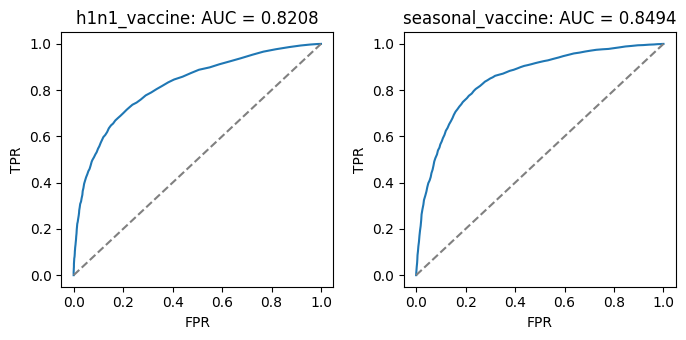

In [257]:
fig, ax = plt.subplots(1, 2, figsize = (7, 3.5))

plot_roc(y_teste["h1n1_vaccine"], y_preds["h1n1_vaccine"], "h1n1_vaccine", ax[0])
plot_roc(y_teste["seasonal_vaccine"], y_preds["seasonal_vaccine"], "seasonal_vaccine", ax[1])

fig.tight_layout()

In [258]:
roc_auc_score(y_teste, y_preds)

np.float64(0.835102362794051)